In [3]:
# Utility
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import os
import seaborn as sn

#Scikit Learn
from sklearn import svm
from sklearn.svm import SVR
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import KNNImputer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import IsolationForest
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import Normalizer

#Catboost
from catboost import CatBoostRegressor
from catboost import Pool

## Tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers

In [4]:
path = r"C:\Users\sbsro\Documents\ML_Projects\House Prices Problem"
os.chdir(path)

In [93]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [94]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 150)

In [7]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
sn.set_theme(style="darkgrid")

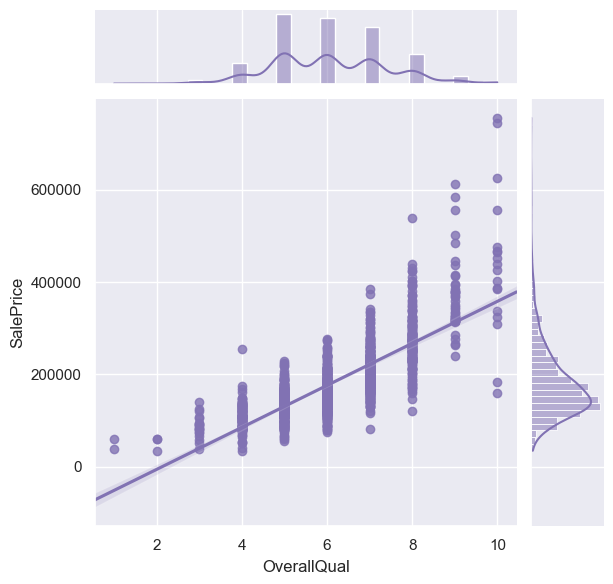

In [9]:
fig1 = sn.jointplot(x="OverallQual", y="SalePrice",data = train, kind = 'reg', truncate = False, color= "m"
                   )

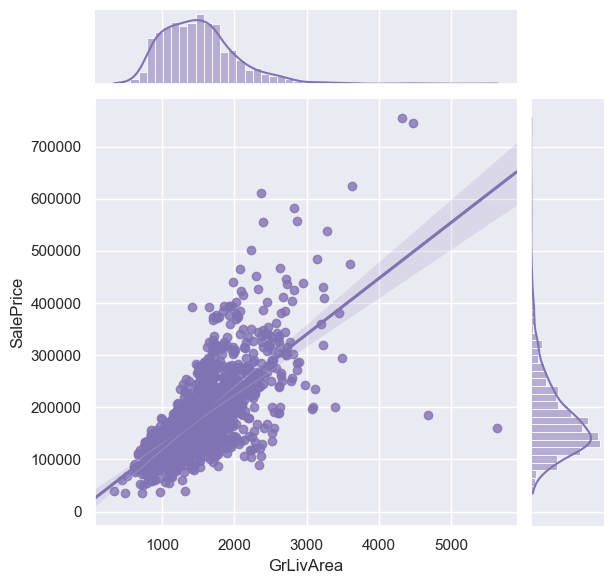

In [10]:
fig2 = sn.jointplot(x="GrLivArea", y="SalePrice", data = train, kind = 'reg', truncate = False, color= "m")

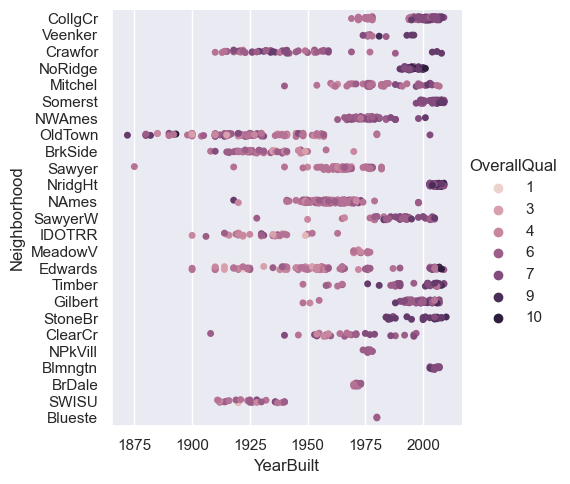

In [11]:
fig3 = sn.catplot(data = train, x = 'YearBuilt', y = 'Neighborhood', hue= "OverallQual")

In [95]:
class Preprocessing():
    def __init__(self):
        pass
    
    def Encode(self,data):
        ordinal_encoder = OrdinalEncoder()
        cl = ["MSZoning", "LotShape", "LandContour", "Utilities", "LotConfig", "Neighborhood", "Condition1",
             "Condition1", "Condition2", "BldgType", "HouseStyle", "OverallQual", "OverallCond", "RoofStyle",
             "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "ExterQual", "ExterCond", "Foundation", 
              "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "Heating", "HeatingQC",
             "Electrical", "KitchenQual", "Functional", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual",
             "GarageCond", "SaleType", "SaleCondition"]
        encoded_data = ordinal_encoder.fit_transform(data[cl])
        data[cl] = encoded_data
        return data
    def Drop(self,data):
        data.drop(columns = ["Alley", "PoolQC", "Fence", "MiscFeature"], inplace = True)
        return data
    
    def Impute(self, data):
        imputer = KNNImputer(n_neighbors= 10)
        data[data.columns[data.isna().any()].tolist()] = imputer.fit_transform(data[data.columns[data.isna().any()].tolist()])
        return data
    
    def onehot(self,data):
        one_hot= list(data.select_dtypes('object'))
        data = pd.get_dummies(data, columns = one_hot)
        return data
    
    def fit_transform(self, data):
        self.Drop(data)
        self.Encode(data)
        self.Impute(data)
        return self.onehot(data)
        

In [96]:
preprocessor = Preprocessing()

In [97]:
train = preprocessor.fit_transform(train)
test = preprocessor.fit_transform(test)

In [98]:
train, test = train.align(test, join = 'outer', axis = 1, fill_value=0)

In [99]:
clf = IsolationForest(max_samples = 50, random_state=42)
clf.fit(train)

IsolationForest(max_samples=50, random_state=42)

In [100]:
ano = clf.predict(train)

In [101]:
ano = pd.DataFrame(ano, columns = ['Anomalies'])

In [102]:
ano.value_counts()

Anomalies
 1           1290
-1            170
Name: count, dtype: int64

In [103]:
train = train.iloc[ano[ano['Anomalies'] == 1].index.values]

In [104]:
list(train.columns)

['1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'BedroomAbvGr',
 'BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtQual',
 'BsmtUnfSF',
 'CentralAir_N',
 'CentralAir_Y',
 'Condition1',
 'Condition2',
 'Electrical',
 'EnclosedPorch',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'FireplaceQu',
 'Fireplaces',
 'Foundation',
 'FullBath',
 'Functional',
 'GarageArea',
 'GarageCars',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'GarageYrBlt',
 'GrLivArea',
 'HalfBath',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'Id',
 'KitchenAbvGr',
 'KitchenQual',
 'LandContour',
 'LandSlope_Gtl',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'LotArea',
 'LotConfig',
 'LotFrontage',
 'LotShape',
 'LowQualFinSF',
 'MSSubClass',
 'MSZoning',
 'MasVnrArea',
 'MasVnrType',
 'MiscVal',
 'MoSold',
 'Neighborhood',
 'OpenPorchSF',
 'OverallCond',
 'OverallQual',
 'PavedDrive_N',
 'PavedDrive_P',
 'Pave

In [105]:
#labels = ['1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2','BsmtUnfSF', 'GarageArea', 'GrLivArea',
          # 'LotArea', 'MasVnrArea', 'MiscVal', 'ScreenPorch', 'TotalBsmtSF', 'WoodDeckSF', 'OpenPorchSF']

In [106]:
#normlab = Normalizer().fit_transform(train[labels])
#train[labels] = normlab

In [107]:
#normlab = Normalizer().fit_transform(test[labels])
#test[labels] = normlab

In [108]:
#train

In [109]:
X_train = train.drop(columns = ["Street_Grvl", "CentralAir_N", "PavedDrive_N", 'Id', 'SalePrice'])

In [110]:
y_train = train["SalePrice"].copy()

In [111]:
X_test = test.drop(columns = ["Street_Grvl", "CentralAir_N", "PavedDrive_N", 'Id', "SalePrice"])

In [112]:
grad = GradientBoostingRegressor(learning_rate=.09, n_estimators=250,subsample=.8)

In [113]:
grad.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.09, n_estimators=250, subsample=0.8)

In [31]:
scores_r2 = -cross_val_score(grad, X_train, np.log(y_train),scoring='neg_root_mean_squared_error', cv=7)

In [32]:
scores_r2

array([0.09355919, 0.10186462, 0.1206783 , 0.13202851, 0.10689347,
       0.09469988, 0.11830785])

In [33]:
rmse_score = np.sqrt(mean_squared_error(grad.predict(X_train), (y_train)))

In [34]:
rmse_score

9119.738767633611

In [35]:
grad_pred = grad.predict(X_test)

In [36]:
Id = pd.read_csv('test.csv')['Id']

In [37]:
output = pd.DataFrame({'Id': Id, 'SalePrice': grad_pred})
output[:10]

,Id,SalePrice
0,1461,125418.680795
1,1462,161913.244158
2,1463,188884.310450
3,1464,190100.082766
4,1465,188939.036700
5,1466,171250.148519
6,1467,174426.023382
7,1468,164441.607120
8,1469,179303.374971
9,1470,126917.718221


In [151]:
output.to_csv('HousingPred(1).csv', index=False)

In [114]:
from catboost import CatBoostRegressor

In [123]:
CB = CatBoostRegressor(verbose=False)
CB.fit(X_train, y_train)

In [124]:
CB_scores = -(cross_val_score(CB, X_train, np.log(y_train), cv = 5, scoring= 'neg_root_mean_squared_error'))

In [125]:
CB_scores

array([0.11009099, 0.12241305, 0.12460634, 0.12242925, 0.12118911])

In [118]:
feat_imp = CB.get_feature_importance(prettified=True)
feat_imp

,Feature Id,Importances
0,OverallQual,18.731480
1,GrLivArea,16.289061
2,TotalBsmtSF,5.910537
3,BsmtFinSF1,5.599752
4,LotArea,3.705304
5,1stFlrSF,3.694133
6,GarageArea,3.176308
7,2ndFlrSF,2.327350
8,YearBuilt,2.241091
9,KitchenQual,2.173335


In [86]:
best_feat = list(feat_imp['Feature Id'])[:10]

In [87]:
X_train = X_train[best_feat]

In [88]:
CB.fit(X_train, y_train)

In [89]:
scores = -cross_val_score(CB, X_train, np.log(y_train), cv = 5, scoring= 'neg_root_mean_squared_error')

In [90]:
scores

array([0.1251576 , 0.12942459, 0.13493263, 0.12608503, 0.12426862])

In [126]:
CB_pred = CB.predict(X_test)

In [128]:
output = pd.DataFrame({'Id': Id, 'SalePrice': CB_pred})
output

,Id,SalePrice
0,1461,125764.303514
1,1462,161004.285802
2,1463,184909.352845
3,1464,191361.717197
4,1465,182206.966415
...,...,...
1454,2915,94215.395969
1455,2916,90116.381838
1456,2917,162780.655928
1457,2918,123633.600614


In [129]:
output.to_csv('Housing Predictions.csv', index= False)